In [1]:
import pandas as pd
import numpy as np

In [2]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
#fetching total score for 1st and 2nd inning

total_score_df = delivery.groupby(['match_id','inning'])['total_runs'].sum().reset_index()
total_score_df.head(10)

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
5,3,2,184
6,4,1,163
7,4,2,164
8,5,1,157
9,5,2,142


In [8]:
total_score_df = total_score_df[total_score_df['inning']==1]
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [9]:
#merge with match df

match_df = matches.merge(total_score_df[['match_id','total_runs']], left_on='id', right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [10]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
team_list = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
           'Kolkata Knight Riders', 'Kings XI Punjab','Chennai Super Kings', 
             'Rajasthan Royals','Delhi Capitals']

In [12]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [13]:
match_df = match_df[match_df['team1'].isin(team_list)]
match_df = match_df[match_df['team2'].isin(team_list)]

In [14]:
match_df.shape

(641, 20)

In [15]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [16]:
match_df['dl_applied'].value_counts()  #No dl applied

dl_applied
0    626
1     15
Name: count, dtype: int64

In [17]:
match_df = match_df[match_df['dl_applied']==0]
match_df.shape

(626, 20)

In [18]:
#getting req columns
match_df = match_df[['match_id','city','winner','total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [19]:
delivery_df = match_df.merge(delivery,on='match_id')
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
delivery_df = delivery_df[delivery_df['inning'] == 2]   #chasing data
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [21]:
delivery_df['current_runs'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [22]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_runs']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200


In [23]:
delivery_df['balls_left'] = 126 - delivery_df['over']*6 - delivery_df['ball']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115


In [24]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: '0' if x == '0' else '1')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [25]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
wickets

array([0, 0, 0, ..., 6, 6, 7])

In [26]:
delivery_df['wickets'] = 10 - wickets
delivery_df.tail(20)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets
149558,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,17,5,SR Watson,...,1,1,2,0,NaN,NaN,116,36,19,6
149559,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,17,6,DJ Bravo,...,1,0,1,0,NaN,NaN,117,35,18,6
149560,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,1,DJ Bravo,...,1,0,1,0,NaN,NaN,118,34,17,6
149561,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,2,SR Watson,...,6,0,6,0,NaN,NaN,124,28,16,6
149562,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,3,SR Watson,...,6,0,6,0,NaN,NaN,130,22,15,6
149563,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,4,SR Watson,...,6,0,6,0,NaN,NaN,136,16,14,6
149564,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,5,SR Watson,...,0,0,0,0,NaN,NaN,136,16,13,6
149565,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,6,SR Watson,...,1,0,1,0,NaN,NaN,137,15,12,6
149566,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,1,SR Watson,...,1,0,1,0,NaN,NaN,138,14,11,6
149567,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,...,0,0,0,1,caught,Q de Kock,138,14,10,5


In [27]:
#current run rate
delivery_df['crr'] = (delivery_df['current_runs'] * 6)/(120 - delivery_df['balls_left'])
delivery_df['crr']

125       6.000000
126       3.000000
127       2.000000
128       4.500000
129       8.400000
            ...   
149573    7.862069
149574    7.897436
149575    7.881356
149576    7.915966
149577    7.850000
Name: crr, Length: 72413, dtype: float64

In [28]:
#required run rate
delivery_df['rrr'] = (delivery_df['runs_left'] * 6)/(delivery_df['balls_left'])
delivery_df['rrr']

125       10.386555
126       10.474576
127       10.564103
128       10.551724
129       10.434783
            ...    
149573     0.000000
149574    -4.000000
149575    -9.000000
149576   -30.000000
149577         -inf
Name: rrr, Length: 72413, dtype: float64

In [29]:
delivery_df.head(20)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
130,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,4,0,NaN,NaN,11,196,114,10,11.000000,10.315789
131,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,NaN,NaN,11,196,113,10,9.428571,10.407080
132,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,NaN,NaN,11,196,112,10,8.250000,10.500000
133,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,1,0,NaN,NaN,12,195,111,10,8.000000,10.540541
134,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,NaN,NaN,12,195,110,10,7.200000,10.636364


In [30]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_runs',
       'runs_left', 'balls_left', 'wickets', 'crr', 'rrr'],
      dtype='object')

In [31]:
#converting result 0 - 1

def results(row):
    return 1 if row['batting_team'] == row['winner'] else 0

delivery_df['result'] = delivery_df.apply(results,axis=1)
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets,crr,rrr,result
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.0,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.0,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.0,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.0,0
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,1,lbw,NaN,157,-5,0,3,7.850000,-inf,0


In [32]:
delivery_df[delivery_df['match_id']==7]   #match_id =2,3,4,6 deleted due to empty city

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left,wickets,crr,rrr,result
624,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,1,PA Patel,...,0,NaN,NaN,0,178,119,10,0.000000,8.974790,1
625,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,2,PA Patel,...,0,NaN,NaN,0,178,118,10,0.000000,9.050847,1
626,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,3,PA Patel,...,0,NaN,NaN,4,174,117,10,8.000000,8.923077,1
627,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,4,PA Patel,...,0,NaN,NaN,4,174,116,10,6.000000,9.000000,1
628,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,5,PA Patel,...,0,NaN,NaN,5,173,115,10,6.000000,9.026087,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,20,1,HH Pandya,...,0,NaN,NaN,170,8,5,4,8.869565,9.600000,1
746,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,20,2,HH Pandya,...,0,NaN,NaN,174,4,4,4,9.000000,6.000000,1
747,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,20,3,HH Pandya,...,0,NaN,NaN,174,4,3,4,8.923077,8.000000,1
748,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,20,4,HH Pandya,...,0,NaN,NaN,176,2,2,4,8.949153,6.000000,1


In [74]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [75]:
#suffle data set as it will be biased on one match

final_df = final_df.sample(final_df.shape[0])
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
51762,Kings XI Punjab,Delhi Daredevils,Delhi,227,114,10,231,4.0,11.947368,0


In [76]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [77]:
final_df.dropna(inplace=True)

In [78]:
final_df.describe()

C:\Users\Yogesh\anaconda3\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,71574.000000,71574.00000,71574.000000,71574.000000,71574.000000,7.157400e+04,71574.000000
mean,92.385824,62.67491,7.538128,165.767541,7.449289,NaN,0.525261
std,50.057328,33.39732,2.139379,29.290992,2.277963,NaN,0.499365
min,-16.000000,-2.00000,0.000000,65.000000,0.000000,-inf,0.000000
25%,53.000000,35.00000,6.000000,147.000000,6.272727,7.156627e+00,0.000000
50%,92.000000,63.00000,8.000000,165.000000,7.500000,8.888889e+00,1.000000
75%,130.000000,92.00000,9.000000,185.000000,8.696629,1.092264e+01,1.000000
max,249.000000,119.00000,10.000000,250.000000,42.000000,inf,1.000000


In [79]:
#removing infinity from rrr as balls left =0 causing error
final_df = final_df[final_df['balls_left'] != 0]
final_df.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,92.621065,62.878725,7.553251,165.726963,7.447791,10.368308,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,13.726365,0.499293
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000,0.000000
25%,53.000000,35.000000,6.000000,147.000000,6.265782,7.151515,0.000000
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.880000,1.000000
75%,130.000000,92.000000,9.000000,185.000000,8.696385,10.894737,1.000000
max,249.000000,119.000000,10.000000,250.000000,42.000000,678.000000,1.000000


### Splitting Dataset

In [80]:
X  = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [81]:
X

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
126483,Mumbai Indians,Sunrisers Hyderabad,Mumbai,109,90,8,130,4.200000,7.266667
60903,Chennai Super Kings,Royal Challengers Bangalore,Chennai,48,17,7,205,9.145631,16.941176
8869,Mumbai Indians,Chennai Super Kings,Chennai,110,49,6,208,8.281690,13.469388
110578,Kolkata Knight Riders,Kings XI Punjab,Kolkata,152,99,9,183,8.857143,9.212121
37387,Mumbai Indians,Kolkata Knight Riders,Mumbai,76,57,9,155,7.523810,8.000000
...,...,...,...,...,...,...,...,...,...
58725,Delhi Daredevils,Kolkata Knight Riders,Kolkata,50,85,10,97,8.057143,3.529412
46378,Chennai Super Kings,Kings XI Punjab,Dharamsala,51,24,7,192,8.812500,12.750000
138594,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,103,84,10,164,10.166667,7.357143
54744,Delhi Daredevils,Mumbai Indians,Mumbai,127,63,6,178,5.368421,12.095238


In [82]:
y

126483    0
60903     1
8869      0
110578    1
37387     1
         ..
58725     1
46378     1
138594    1
54744     0
79211     0
Name: result, Length: 71342, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [84]:
X_train.shape

(57073, 9)

In [85]:
X_test.shape

(14269, 9)

In [86]:
y_train.shape

(57073,)

In [87]:
y_test.shape

(14269,)

### OHE categorical columns

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

trf = ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop = 'first'),['batting_team','bowling_team','city'])],remainder='passthrough')

### Pipeline Building

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [90]:
pipe = Pipeline(steps = [
                ('step1', trf),
                ('step2', LogisticRegression(solver='liblinear'))
                        ])

In [91]:
pipe.fit(X_train,y_train)

C:\Users\Yogesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [92]:
y_pred_lr = pipe.predict(X_test)
y_pred_lr

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
accuracy_score(y_test,y_pred_lr)

0.8064335272268555

In [95]:
print(confusion_matrix(y_test,y_pred_lr))

[[5317 1461]
 [1301 6190]]


In [96]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6778
           1       0.81      0.83      0.82      7491

    accuracy                           0.81     14269
   macro avg       0.81      0.81      0.81     14269
weighted avg       0.81      0.81      0.81     14269



In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = Pipeline(steps = [
                ('step1', trf),
                ('step2', RandomForestClassifier())
                        ])

In [58]:
rf.fit(X_train,y_train)

C:\Users\Yogesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [59]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [60]:
accuracy_score(y_test,y_pred_rf)

0.9988086060691008

In [61]:
print(confusion_matrix(y_test,y_pred_rf))

[[6684    8]
 [   9 7568]]


In [62]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6692
           1       1.00      1.00      1.00      7577

    accuracy                           1.00     14269
   macro avg       1.00      1.00      1.00     14269
weighted avg       1.00      1.00      1.00     14269



In [63]:
rf.predict_proba(X_test)[7]

array([0.1, 0.9])

In [64]:
pipe.predict_proba(X_test)[10]

array([0.06688287, 0.93311713])

Random forest is giving high accuracy and strong predictions but we want prob of both teams so used Logistic Regression

In [97]:
#Passing all data from one match

def match_progression(x_df,match_id,pipe):
    
    match = x_df[x_df['match_id']==match_id]
    match = match[(match['ball']==6)]
    temp_df = match[['batting_team','bowling_team','city','total_runs_x','runs_left','balls_left','wickets','current_runs','crr','rrr']]
    temp_df = temp_df[temp_df['balls_left']!=0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets  = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw-w)[0:temp_df.shape[0]]
    
    print('Target :', target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    
    return temp_df,target

In [98]:
temp_df, target = match_progression(delivery_df,74,pipe)
temp_df

Target : 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,55.8,44.2
10467,2,8,0,50.4,49.6
10473,3,1,0,57.2,42.8
10479,4,7,1,69.0,31.0
10485,5,12,0,58.8,41.2
10491,6,13,0,46.4,53.6
10497,7,9,0,40.5,59.5
10505,8,15,0,26.8,73.2
10511,9,7,0,24.7,75.3
10518,10,17,0,13.5,86.5


Text(0.5, 1.0, 'Target :178')

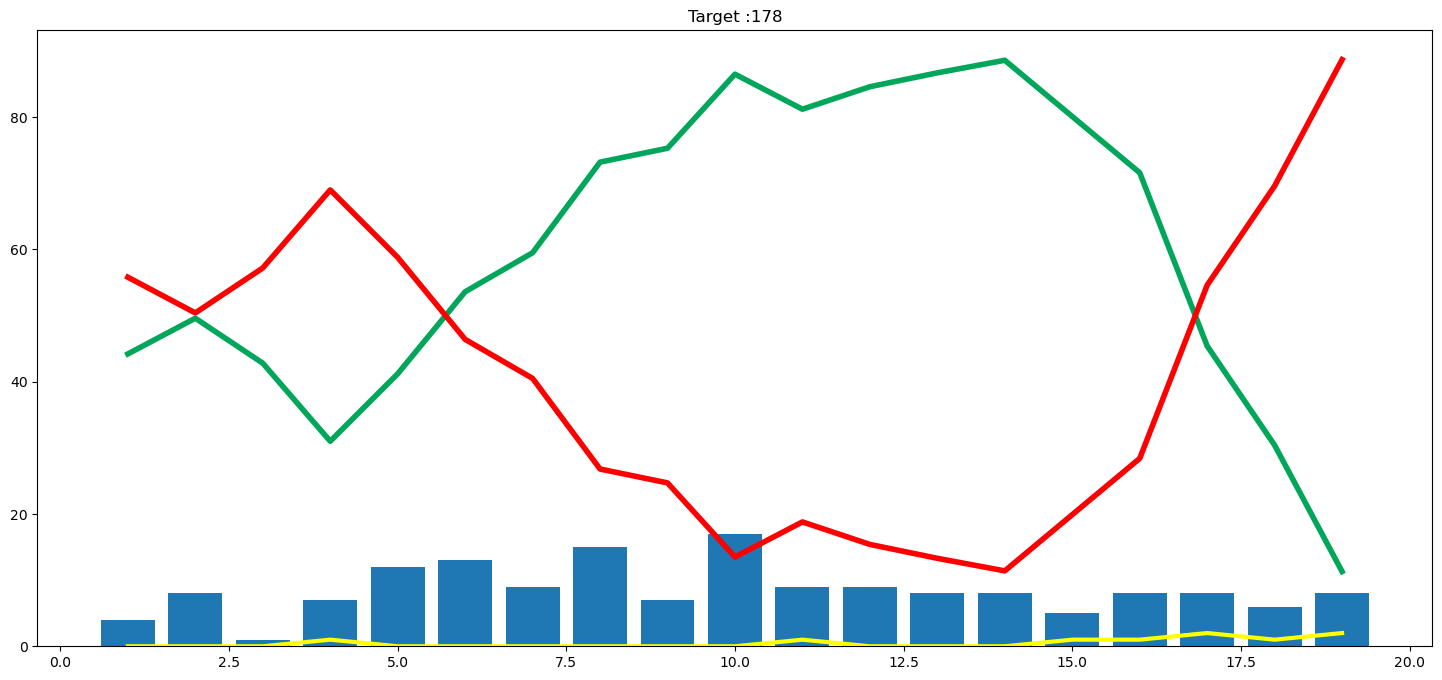

In [99]:
#Plotting graph

import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])

plt.title('Target :'+str(target))

### Getting list of values

In [68]:
team_list

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [69]:
city_list = final_df['city'].unique().tolist()
city_list

['Chandigarh',
 'Chennai',
 'Bangalore',
 'Delhi',
 'Cape Town',
 'Jaipur',
 'Kolkata',
 'Mumbai',
 'Johannesburg',
 'Sharjah',
 'Mohali',
 'Nagpur',
 'Hyderabad',
 'Dharamsala',
 'Indore',
 'Centurion',
 'Abu Dhabi',
 'Kimberley',
 'Ranchi',
 'Bengaluru',
 'Durban',
 'Raipur',
 'Visakhapatnam',
 'Pune',
 'Ahmedabad',
 'Cuttack',
 'Port Elizabeth',
 'East London',
 'Bloemfontein']

### Exporting model

In [70]:
# import pickle

In [71]:
# pickle.dump(lr,open('lr_model.pkl','wb'))

In [72]:
# pickle.dump(rf,open('rf_model.pkl','wb'))

In [100]:
from joblib import dump

# Assuming your column transformer object is named 'column_transformer'
# and you want to save it to a file named 'transformer.joblib'
dump(pipe, 'model_1.joblib')


['model_1.joblib']